# INTRODUCTION

    ## What topic does the dataset cover? 

    ## Objectives of the notebook:

    ## The machine learning models used in this dataset are:

    ## Explanation of the variables of the dataset:

# IMPORTING THE NECESSARY MODULES 

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
#from statsmodels.tools import add_constant
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
import joblib

# DATA PREPARATION

## 1 | Reading the data set

In [2]:
df = pd.read_csv('input/heart_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,Yes,Yes,5,Yes,No
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,No,Yes,7,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,Yes,Yes,8,Yes,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,No,No,6,No,No
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,No,Yes,8,No,No


## 2 | Summary Of Numerical Features

In [3]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


## 3 | Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Diabetic          319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  SleepTime         319795 non-null  int64  
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 36.6+ MB


In [5]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Diabetic               4
PhysicalActivity       2
SleepTime             24
Asthma                 2
KidneyDisease          2
dtype: int64

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
SleepTime           0
Asthma              0
KidneyDisease       0
dtype: int64

In [7]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

# EXPLORATORY ANALYSIS

## 1 | Visualization Of Categorical Features

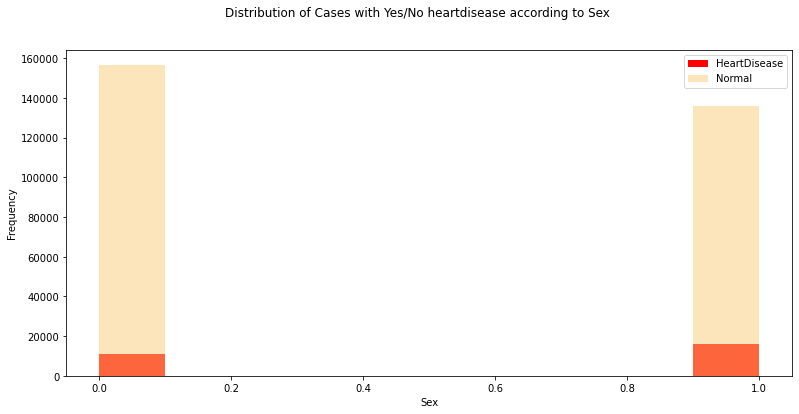

In [8]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=10, alpha=1, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=10, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

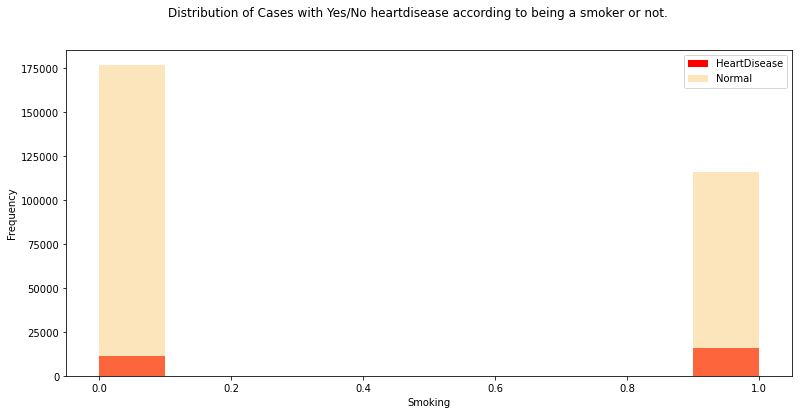

In [9]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=10, alpha=1, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=10, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smoker or not.")

ax.legend();

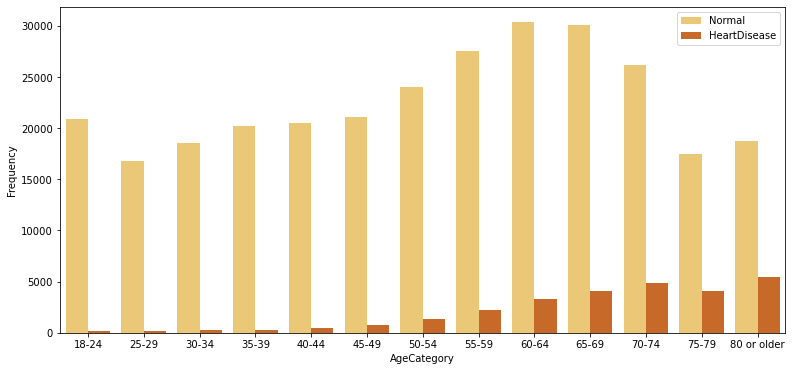

In [10]:
df.sort_values(by=['AgeCategory'], ascending=True, inplace=True)
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

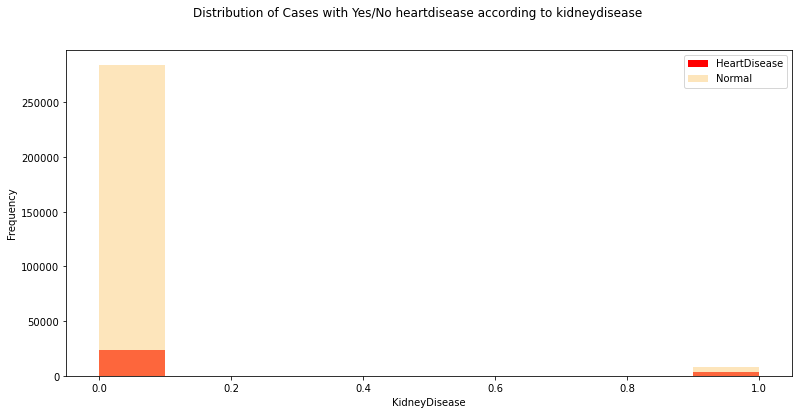

In [11]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["KidneyDisease"], bins=10, alpha=1, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["KidneyDisease"], bins=10, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

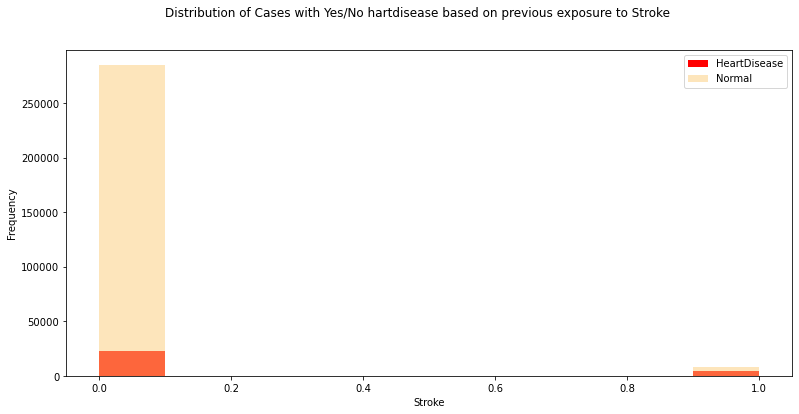

In [12]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Stroke"], bins=10, alpha=1, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Stroke"], bins=10, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend();

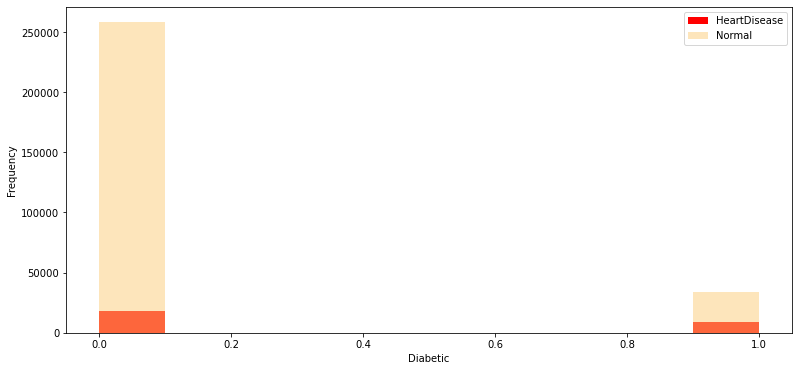

In [13]:
ig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Diabetic"], bins=10, alpha=1, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Diabetic"], bins=10, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease based on previous exposure to Diabetic")

ax.legend();

## 2 | Visualization Of Numerical Features

<AxesSubplot:>

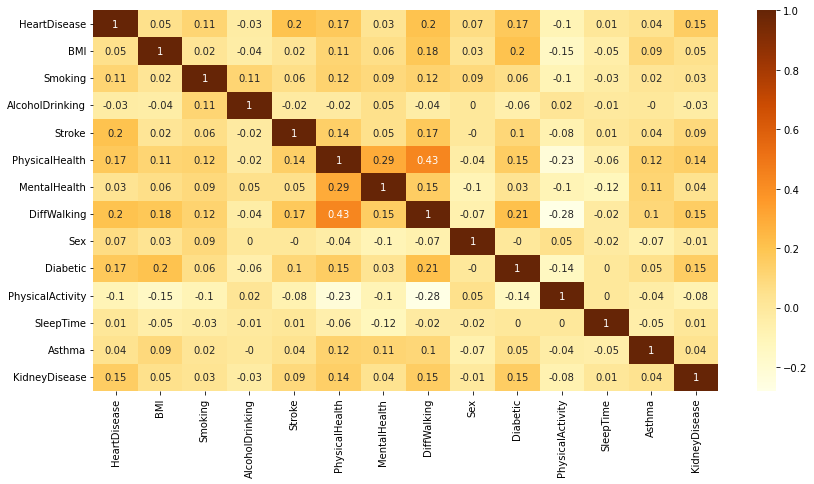

In [14]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

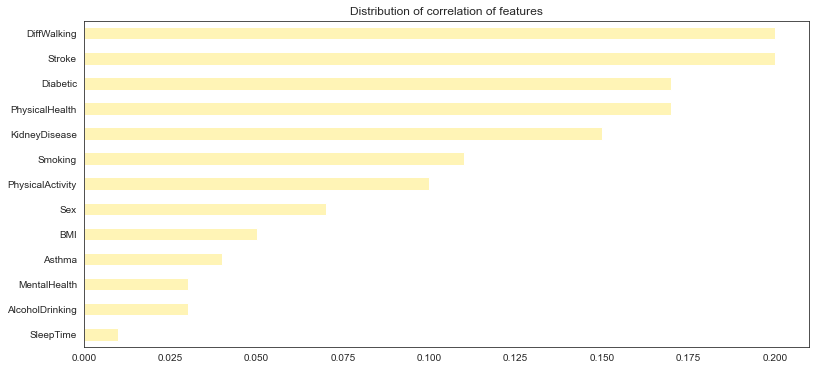

In [15]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

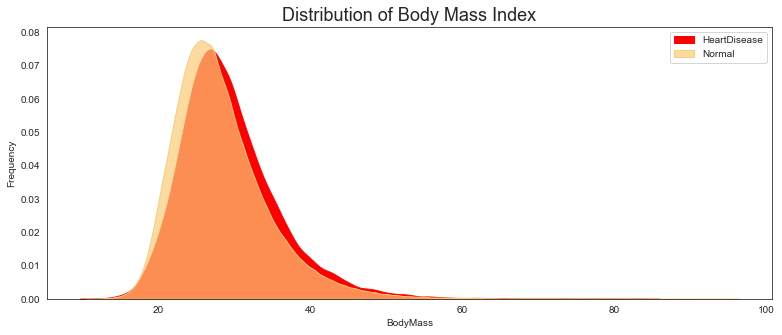

In [16]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

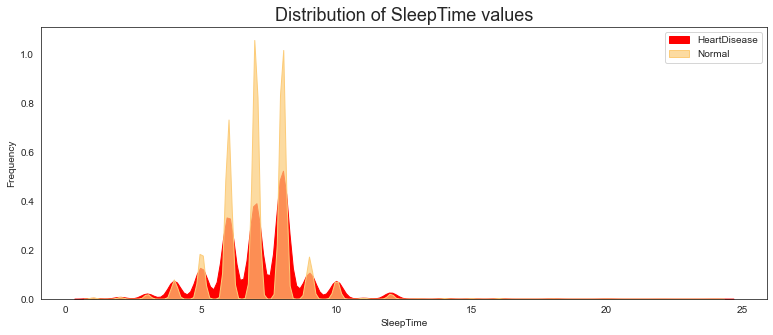

In [17]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

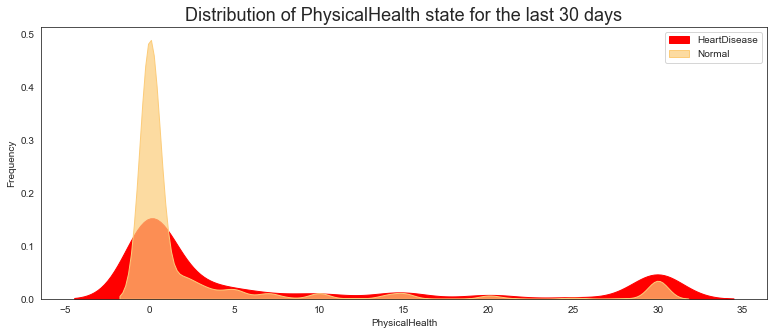

In [18]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) 
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

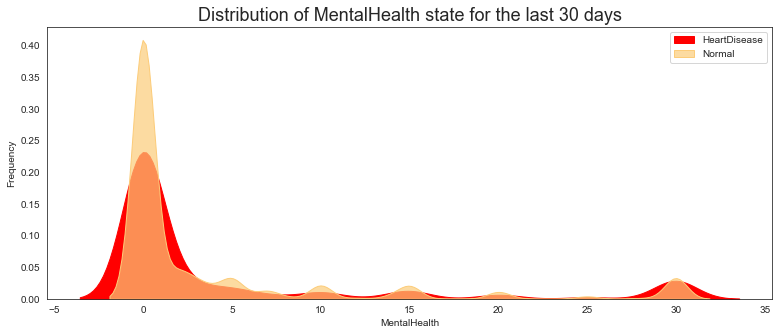

In [19]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MentalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

In [20]:

df.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

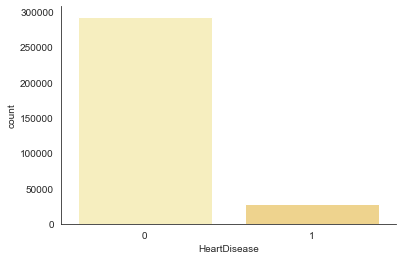

In [21]:
sns.countplot(x='HeartDisease', data=df)
sns.despine()

# SPLITTING DATASET FOR TRAINING & TESTING

In [22]:
features = df.drop(columns =['HeartDisease'], axis = 1)

#Selecting Target 
target = df['HeartDisease']

# Setting Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 4)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 14)
Shape of testing feature: (63959, 14)
Shape of training label: (255836,)
Shape of training label: (63959,)


# DATA PREPROCESSING

## 1 | Encoding

In [23]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory']),
    remainder='passthrough')

# Encode training data 
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
#X_train = pd.concat([transformed_train_data, X_train], axis=1)
X_train = transformed_train_data
# Remove old columns
#X_train.drop(['AgeCategory'], axis = 1, inplace = True)



# Encode test data 
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
#X_test = pd.concat([transformed_test_data, X_test], axis=1)
X_test = transformed_test_data

# Remove old columns
#X_test.drop(['AgeCategory'], axis = 1, inplace = True)

In [41]:
len(X_test[0])

26

## 2 | Standardization

In [24]:
#scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

# Scale training data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

In [25]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
289336,0,21.83,0,0,0,20,8,0,1,18-24,0,1,8,0,0
92977,0,21.14,0,0,0,0,0,0,0,18-24,0,1,9,0,0
228704,0,20.81,0,0,0,0,10,0,0,18-24,0,1,7,1,0
49749,0,20.84,1,0,0,0,3,0,1,18-24,0,0,10,0,0
49753,0,24.33,0,0,0,0,0,0,1,18-24,0,1,7,0,0


# MODELLING

In [26]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## 1 | Building Model

In [39]:
lX_train[0])

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  1.        , -1.        , -0.41470482, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
        1.        ,  1.        , -1.        , -0.56521739, -1.        ,
       -1.        ])

    ## Logistic Regression

In [28]:

from statsmodels.tools import add_constant
df_constant = add_constant(df)
df_constant.head()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
289336,1.0,0,21.83,0,0,0,20,8,0,1,18-24,0,1,8,0,0
92977,1.0,0,21.14,0,0,0,0,0,0,0,18-24,0,1,9,0,0
228704,1.0,0,20.81,0,0,0,0,10,0,0,18-24,0,1,7,1,0
49749,1.0,0,20.84,1,0,0,0,3,0,1,18-24,0,0,10,0,0
49753,1.0,0,24.33,0,0,0,0,0,0,1,18-24,0,1,7,0,0


In [29]:
st.chisqprob = lambda chisq, hdf: st.chi2.sf(chisq, hdf)
df_const = df_constant.drop(columns =['HeartDisease'], axis = 1)
cols=df_const.columns[:]

model=sm.Logit(np.asarray(y_train),np.asarray(X_train))
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.233155
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               255836
Model:                          Logit   Df Residuals:                   255810
Method:                           MLE   Df Model:                           25
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.2036
Time:                        14:29:44   Log-Likelihood:                -59649.
converged:                       True   LL-Null:                       -74899.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7231      0.046    -15.680      0.000      -0.813      -0.633
x2            -0.6215      0.044    -14.005      0.000      -0.708      -0.534
x3            -0.4695      0.036    -13.171      0.000      -0.539      -0.400
x4            -0.4153      0.032    -13.111      0.000      -0.477      -0.353
x5            -0.2032      0.026     -7.885      0.000      -0.254      -0.153
x6            -0.0282      0.022     -1.294      0.196      -0.071       0.015
x7             0.1899      0.018     10.822      0.000       0.156       0.224
x8             0.3173      0.015     20.620      0.000       0.287       0.347
x9             0.4572      0.014     32.926      0.000       0.430       0.484
x10            0.5846      0.013     43.766      0.000       0.558       0.611
x11            0.7378      0.013     56.508      0.000       0.712       0.763
x12            0.8420      0.014     61.035      0.000       0.815       0.869
x13            0.9936      0.013     75.318      0.000       0.968       1.019
x14            0.5710      0.053     10.863      0.000       0.468       0.674
x15            0.2238      0.008     28.326      0.000       0.208       0.239
x16           -0.1332      0.019     -7.155      0.000      -0.170      -0.097
x17            0.5764      0.013     46.014      0.000       0.552       0.601
x18            0.3224      0.013     25.661      0.000       0.298       0.347
x19            0.1525      0.015     10.423      0.000       0.124       0.181
x20            0.2088      0.010     21.062      0.000       0.189       0.228
x21            0.3598      0.008     44.919      0.000       0.344       0.375
x22            0.3016      0.009     33.427      0.000       0.284       0.319
x23           -0.0380      0.009     -4.289      0.000      -0.055      -0.021
x24           -0.4013      0.056     -7.161      0.000      -0.511      -0.291
x25            0.1769      0.011     16.622      0.000       0.156       0.198
x26            0.3489      0.014     25.817      0.000       0.322       0.375
==============================================================================
"""

    ## Feature Selection: Backward elemination (P-value approach)

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
lr = LogisticRegression(C=1.0, random_state=1)
#
# Number of features
#
k_features = 5
#
# Instantiate SequentialBackwardSearch
#
sfs = SFS(lr, k_features)
#
# Fit the data to determine the k_features which give the
# most optimal model performance
#
sfs.fit(X_train, y_train)
#
# Transform the training data set to dataset having k_features
# giving most optimal model performance
#
X_train_sfs = sfs.transform(X_train)
#
# Transform the test data set to dataset having k_features
#
X_test_sfs = sfs.transform(X_test)



In [31]:
model=sm.Logit(np.asarray(y_train),np.asarray(X_train_sfs))
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.326865
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               255836
Model:                          Logit   Df Residuals:                   255831
Method:                           MLE   Df Model:                            4
Date:                Sat, 13 May 2023   Pseudo R-squ.:                 -0.1165
Time:                        14:31:39   Log-Likelihood:                -83624.
converged:                       True   LL-Null:                       -74899.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4371      0.009     46.088      0.000       0.418       0.456
x2             0.5804      0.010     60.257      0.000       0.562       0.599
x3             0.5271      0.009     55.514      0.000       0.508       0.546
x4             0.4810      0.009     51.256      0.000       0.463       0.499
x5             0.5023      0.009     54.290      0.000       0.484       0.520
==============================================================================
"""

    ## Decision Tree

In [32]:
# Building Decision Tree model 

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

#filename = 'finalized_model.sav'
joblib.dump(clf, 'assets/model/decision_tree.sav')
# Evaluating Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.8645538548132398
Precision: 0.22565922920892495
Recall: 0.24644637253092117
F1 Score: 0.23559516456366364
Cohens Kappa Score: 0.16144689609718132
Area Under Curve: 0.5878730717823961
Confusion Matrix:
 [[53961  4581]
 [ 4082  1335]]


<AxesSubplot:>

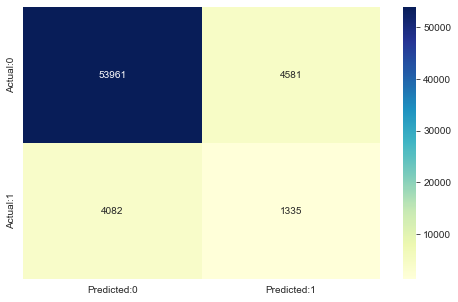

In [33]:
cm = clf_eval['cm']
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Predicting using new data

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [45]:
pipe = joblib.load('assets/model/decision_tree.sav')
sheet_id = "1tEGHGwusxsX1Muw4haUhTMtZnNC7AcXhvzbUo_Q5boo"
sheet_name = "Form Responses 2"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
url = url.replace(" ", "%20")
X = pd.read_csv(url)
X = X.rename(columns={'Enter Your Name': 'pname', 'Email Address' : 'BMI', 'Enter your body weight (in kg)':'Weight', 'Enter your height (in cm)' : 'Height', 'Enter Your Age' : 'Age', 'Do you Smoke' : 'Smoke', 'Do you consume alcohol?' : 'Alcohol', 'Have you ever had a heart attack or stroke?' : 'Stroke', 'From how many days have you been experiencing weak physical health?' : 'PhysicalHealth', 'From how many days have you been experiencing weak mental health?' : 'MentalHealth', 'Do you have difficulty in walking?' : 'DiffWalking', 'Do you have diabetes?' : 'Diabetic', 'Do you do any physical activity other than work?' : 'PhysicalAct', 'How many hours of sleep do you typically get per night?' : 'Sleep', 'Do you have Asthama?': 'Asthama', 'Do you have kidney disease?"' : 'Kidney'})
   
X =  X[X.columns].replace({'Yes':1, 'No':0, 'Male':1, "Female":0 })
X.BMI = X.Weight / (X.Height * X.Height / 10000)
n = X.pname.iloc[-1]
X = X.drop(['Timestamp', 'pname','Weight', 'Height'], axis=1)
transformer = make_column_transformer((OneHotEncoder(sparse=False), ['Age']), remainder='passthrough')

# Encode test data 
transformed_test = transformer.fit_transform(X)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
X = transformed_test_data
        
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X)
        
# Scale test data
X = scaler.fit_transform(X)
# apply the whole pipeline to data
pred = pipe.predict(X[[-1]])
print(n)
print(pred)

q
[1]
